# AirFare Prediction using Python

## 1. Introduction

This notebook deals with the problem of airfare prediction. For this purpose a set of features characterizing a typical flight is considered, supposing that these features affect the price of an air ticket.

The dataset AirFaresData.csv containg real data that were collected between Q3-1996 and Q2-97 is used in which there are 17 variables to predict the price of the air ticket. 

## 2. Importing the packages and loading the data

### 2.1. Importing the packages

In [56]:
# library used for preprocessing the data set
from sklearn import preprocessing
# libraries used for data analysis
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt # to visualize the data
import seaborn as sns # visualize the data
from statsmodels.stats.outliers_influence import variance_inflation_factor # to find collinearity between variables
from sklearn.model_selection import train_test_split # to split the data to train and test sets
from sklearn.metrics import mean_squared_error,r2_score # to caoculate model evaluation metrics

### 2.2. Loading the dataset 

#### Loading the AirFareData.csv into a pandas dataframe

In [2]:
flight_data = pd.read_csv('AirfaresData.csv')

In [3]:
flight_data.shape

(638, 18)

#### Viewing the first five record of the dataset usind head() function

In [4]:
flight_data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,85.47


### Variable Description

<b>Which features are categorical?</b>
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

<b>Categorical Variable:</b> S_CODE,SCITY,E_CODE,E_CITY,NEW,VACATION,SW,SLOT,GATE

<b>Which features are numerical?</b>
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

<b>Numerical Variable: </b>COUPON,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE

#### The above are the first five values of each attribute in the dataset<br>
There are 18 attributes in the dataset and the description of attributes is below:

<strong>S_CODE : </strong>starting airport’s code<br>
<strong>S_CITY : </strong>starting city<br>
<strong>E_CODE : </strong>ending airport’s code<br>
<strong>E_CITY : </strong>ending city<br>
<strong>COUPON : </strong>average number of coupons for that route<br>
<strong>NEW : </strong>number of new carriers entering that route <br>
<strong>VACATION : </strong>whether a vacation route (Yes) or not (No)<br>
<strong>SW : </strong>whether Southwest Airlines serves that route (Yes) or not (No)<br>
<strong>HI : </strong>Herfindel Index – measure of market concentration (refer to BMGT 681)<br>
<strong>S_INCOME : </strong>starting city’s average personal income<br>
<strong>E_INCOME : </strong>ending city’s average personal income<br>
<strong>S_POP: </strong>starting city’s population<br>
<strong>E_POP : </strong>ending city’s population<br>
<strong>SLOT : </strong>whether either endpoint airport is slot controlled or not(measure of airport congestion)<br>
<strong>GATE : </strong>whether either endpoint airport has gate constraints or not(measure of airport congestion)<br>
<strong>DISTANCE : </strong>distance between two endpoint airports in miles<br>
<strong>PAX : </strong>number of passengers on that route during period of data collection<br>
<strong>FARE : </strong>average fare on that route<br>

## 3. Analize the data

### 3.1. Describe data

#### Describing the details of the numerical variables using describe()

In [5]:
flight_data.describe()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,6.380000e+02,638.000000,638.000000,638.000000
mean,1.202335,2.753918,4442.141129,27759.860502,27663.727273,4.557004e+06,3.194503e+06,975.653605,12782.214734,160.876677
std,0.203821,0.760448,1724.267051,3596.207837,4611.325018,3.010985e+06,2.735604e+06,646.242403,13202.228860,76.022436
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23903.000000,1.862106e+06,1.228816e+06,455.000000,5328.500000,106.290000
50%,1.150000,3.000000,4208.185000,28637.000000,26409.000000,3.532657e+06,2.195215e+06,850.000000,7792.000000,144.600000
75%,1.297500,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1306.250000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


#### The output shows that there are 638 records in the dataset and the mean,standard deviation,minimum and maximum values for each column of the dataset.

### 3.2. Data Types of the variables

#### info() can be used to describe the datatypes of each variable

In [6]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
S_CODE      638 non-null object
S_CITY      638 non-null object
E_CODE      638 non-null object
E_CITY      638 non-null object
COUPON      638 non-null float64
NEW         638 non-null int64
VACATION    638 non-null object
SW          638 non-null object
HI          638 non-null float64
S_INCOME    638 non-null int64
E_INCOME    638 non-null int64
S_POP       638 non-null int64
E_POP       638 non-null int64
SLOT        638 non-null object
GATE        638 non-null object
DISTANCE    638 non-null int64
PAX         638 non-null int64
FARE        638 non-null float64
dtypes: float64(3), int64(7), object(8)
memory usage: 89.8+ KB


#### there are 3 types of datatypes present in the dataset i.e float64, int64, object.

## 4. Data Preprocessing

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. 

#### using preprocessing.LableEncoder() from scikit learn library the data present in the 'SLOT' is transformed to numeric data

In [7]:
le_slot=preprocessing.LabelEncoder()
flight_data['SLOT']=le_slot.fit_transform(flight_data['SLOT'].astype(str))

In [8]:
flight_data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,1,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,1,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,1,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,0,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,1,Free,612,25144,85.47


#### In the above output SLOT=1 represents 'Free' and SLOT=0 represents 'controlled'

In [9]:
le_slot.classes_

array(['Controlled', 'Free'], dtype=object)

#### The above out put displays the unique classes presentin the lable encoder of SLOT variable

#### using preprocessing.LableEncoder() from scikit learn library the data present in the 'GATE' is transformed to numeric data

In [10]:
le_gate=preprocessing.LabelEncoder()
flight_data['GATE']=le_gate.fit_transform(flight_data['GATE'].astype(str))

In [11]:
le_gate.classes_

array(['Constrained', 'Free'], dtype=object)

In [12]:
flight_data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47


#### In the above output GATE=1 represents 'Free' and GATE=0 represents 'Constrained'

#### using preprocessing.LableEncoder() from scikit learn library the data present in the 'VACATION' is transformed to numeric data

In [13]:
le_vacation=preprocessing.LabelEncoder()
flight_data['VACATION']=le_vacation.fit_transform(flight_data['VACATION'].astype(str))

In [14]:
le_vacation.classes_

array(['No', 'Yes'], dtype=object)

In [15]:
flight_data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,0,Yes,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,0,No,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,0,No,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,Yes,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,Yes,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47


#### In the above output VACATION=1 represents 'yes' and VACATION=0 represents 'No'

#### using preprocessing.LableEncoder() from scikit learn library the data present in the 'SW' is transformed to numeric data

In [16]:
le_sw=preprocessing.LabelEncoder()
flight_data['SW']=le_sw.fit_transform(flight_data['SW'].astype(str))

In [17]:
flight_data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47


#### In the above output SW=1 represents 'yes' and SW=0 represents 'No'

#### Categorizing the the booking having at least one high Traffic or not, booking with E_code or S_CODE as * is called as non traffic city

In [18]:
flight_data['AtleastOneHighTrafficCity'] = np.where((flight_data['S_CODE']=='*')|(flight_data['E_CODE']=='*'), '0', '1')

In [19]:
flight_data.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,AtleastOneHighTrafficCity
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11,0
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47,0
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76,0
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47,0
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47,0


#### In the above output the value of 'AtleastOneHighTrafficCity' is '0' if there are no high traffic cities either in the source or destination and it '1' otherwise

#### Dropping the columns S_CODE, S_CITY,E_CODE,E_CITY as the column 'AtleastOneHighTrafficCity' is defined based on these variables

In [20]:
flight_data=flight_data.drop(columns=['S_CODE', 'S_CITY','E_CODE','E_CITY'])

#### Converting the whole data frame into numeric as model requires only numeric data 

In [21]:
flight_numeric=flight_data.apply(pd.to_numeric,errors='coerce')

In [22]:
flight_numeric.head()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,AtleastOneHighTrafficCity
0,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,64.11,0
1,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,174.47,0
2,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,207.76,0
3,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,85.47,0
4,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,85.47,0


In [23]:
flight_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 15 columns):
COUPON                       638 non-null float64
NEW                          638 non-null int64
VACATION                     638 non-null int64
SW                           638 non-null int64
HI                           638 non-null float64
S_INCOME                     638 non-null int64
E_INCOME                     638 non-null int64
S_POP                        638 non-null int64
E_POP                        638 non-null int64
SLOT                         638 non-null int64
GATE                         638 non-null int64
DISTANCE                     638 non-null int64
PAX                          638 non-null int64
FARE                         638 non-null float64
AtleastOneHighTrafficCity    638 non-null int64
dtypes: float64(3), int64(12)
memory usage: 74.8 KB


## 5. Correlation Between the variables

#### Calculating correlation of the variables against each variable

In [24]:
corr = flight_numeric.corr()
corr

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE,AtleastOneHighTrafficCity
COUPON,1.000000,0.020223,0.071424,-0.188098,-0.347252,-0.088403,0.046889,-0.107763,0.094970,-0.021901,0.064369,0.746805,-0.336974,0.496537,-0.126857
NEW,0.020223,1.000000,-0.047433,-0.081881,0.054147,0.026597,0.113377,-0.016672,0.058568,-0.058414,-0.013106,0.080965,0.010495,0.091730,0.025557
VACATION,0.071424,-0.047433,1.000000,0.025488,-0.151625,-0.216393,-0.076288,-0.208549,-0.167054,0.129514,0.116838,0.093198,-0.017747,-0.276868,-0.096664
SW,-0.188098,-0.081881,0.025488,1.000000,-0.040172,-0.272269,-0.281160,-0.089282,-0.221272,0.251593,0.255782,-0.240485,-0.052468,-0.543813,-0.106017
HI,-0.347252,0.054147,-0.151625,-0.040172,1.000000,-0.027382,0.082393,-0.172495,-0.062456,0.185179,-0.155182,-0.312375,-0.168961,0.025195,-0.081468
S_INCOME,-0.088403,0.026597,-0.216393,-0.272269,-0.027382,1.000000,-0.138864,0.517187,-0.272280,-0.231868,-0.108193,0.028153,0.138197,0.209135,0.129404
E_INCOME,0.046889,0.113377,-0.076288,-0.281160,0.082393,-0.138864,1.000000,-0.144059,0.458418,-0.197481,-0.062807,0.176531,0.259961,0.326092,0.163459
S_POP,-0.107763,-0.016672,-0.208549,-0.089282,-0.172495,0.517187,-0.144059,1.000000,-0.280143,-0.281576,-0.085900,0.018437,0.284611,0.145097,0.190305
E_POP,0.094970,0.058568,-0.167054,-0.221272,-0.062456,-0.272280,0.458418,-0.280143,1.000000,-0.246216,-0.149666,0.115640,0.314698,0.285043,0.169103
SLOT,-0.021901,-0.058414,0.129514,0.251593,0.185179,-0.231868,-0.197481,-0.281576,-0.246216,1.000000,-0.143628,-0.009483,-0.243143,-0.209438,-0.187271


#### Plotting a heatmap to represent the correlation of the variables

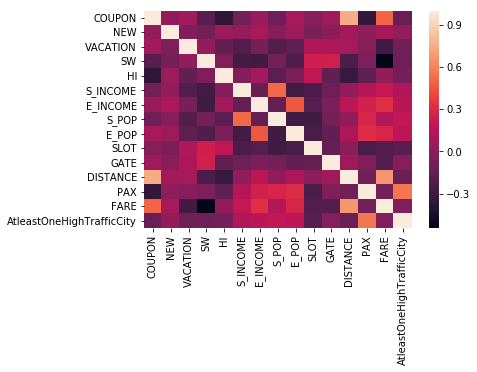

In [25]:
# constructing a heatmap to visualize the correlation between variables
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### The above heatmap describes the correlation between the variables

## 6. Data Visualization

#### Plotting a graph which represents frequency for different fare ranges

Text(0,0.5,'frequency')

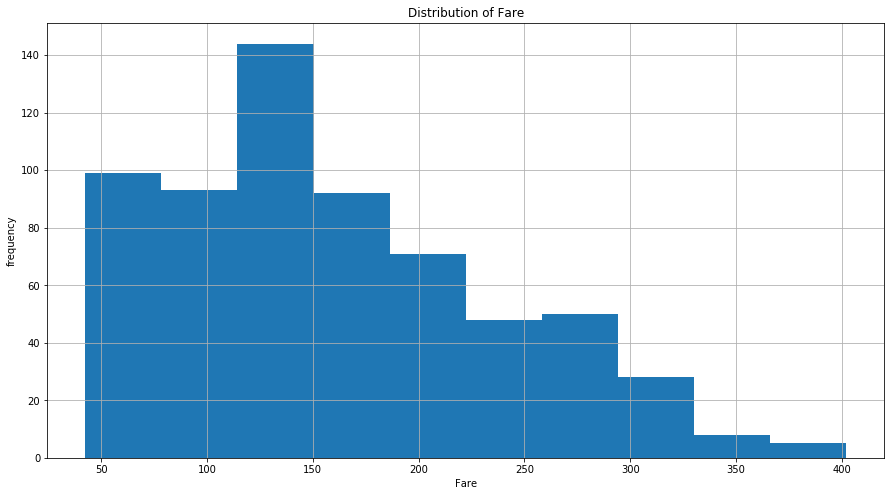

In [26]:
plt.figure(figsize=(15,8)) #setting the size of the chart
flight_numeric['FARE'].hist() #constructing histogram
plt.title('Distribution of Fare') # display title of the histogram
plt.xlabel('Fare') # setting the x-axis label
plt.ylabel('frequency') # setting y-axis label

#### The above plot shows that there are more number of passengers for flight fare between 100 to 150$

## 7.Feature Selection

#### Extracting features from the dataset used to predict the 'FARE'

In [27]:
x=flight_numeric.drop('FARE',axis=1) # seperation the target variable form the data

In [28]:
x.head() # to view the data present in the feature variables

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,AtleastOneHighTrafficCity
0,1.00,3,0,1,5291.99,28637,21112,3036732,205711,1,1,312,7864,0
1,1.06,3,0,0,5419.16,26993,29838,3532657,7145897,1,1,576,8820,0
2,1.06,3,0,0,9185.28,30124,29838,5787293,7145897,1,1,364,6452,0
3,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,0,1,612,25144,0
4,1.06,3,0,1,2657.35,29260,29838,7830332,7145897,1,1,612,25144,0


#### The above output is the data of first five records in the feature set

#### Extracting the target variable values from the data set

In [29]:
y=flight_numeric['FARE'] # seperating the target variable from the dataset

In [30]:
y.head() # to view the data present in the target variable

0     64.11
1    174.47
2    207.76
3     85.47
4     85.47
Name: FARE, dtype: float64

## 8. Collinearity

In statistics, Collinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors.

### 8.1. Finding Collinearity between the Variables 

Collinearity of the individual variable can be identified by calculating the variance inflation factor of each variable. Higher the VIF value higher the collinearity.

In [31]:
vif = pd.DataFrame() #creating a dataframe
vif["features"] = x.columns # adding a cloumn representing the variable names
vif["VIF Value"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])] #calculating VIF values
vif 

,features,VIF Value
0,COUPON,69.642955
1,NEW,14.105494
2,VACATION,1.651900
3,SW,1.970308
4,HI,10.303076
5,S_INCOME,60.825846
6,E_INCOME,45.483994
7,S_POP,6.283206
8,E_POP,4.840937
9,SLOT,4.753653


### 8.2. Removing the highly collinear variables(considering threshold as 10)

In [32]:
x=x.drop(x.columns[[0,5]], axis=1) # dopping the variables COUPON, S_INCOME that are highly collinear

In [33]:
x.head()

,NEW,VACATION,SW,HI,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,AtleastOneHighTrafficCity
0,3,0,1,5291.99,21112,3036732,205711,1,1,312,7864,0
1,3,0,0,5419.16,29838,3532657,7145897,1,1,576,8820,0
2,3,0,0,9185.28,29838,5787293,7145897,1,1,364,6452,0
3,3,0,1,2657.35,29838,7830332,7145897,0,1,612,25144,0
4,3,0,1,2657.35,29838,7830332,7145897,1,1,612,25144,0


#### The above output is the data of the variables used to predict the target variable

## 9. Train and Test Split

#### Splitting the the whole data into train and test sets 75% for training and 25% for testing

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

### 10. Building Models

### A function to display the results

In [35]:
# function displays the result by combining the test features, actual values of target variable, Predicted values
def displayResults(ModelName,test_features,test_target,pred):
    df1=pd.DataFrame(test_features)
    df1=df1.reset_index(drop=True)
    df2=pd.DataFrame(test_target)
    df2=df2.reset_index(drop=True)
    df3=pd.DataFrame(data=pred,columns=['Predicted Fare'])
    out=pd.concat([df1,df2,df3], axis=1)
    print("Resultant values of",ModelName)
    return out;
# returns the dataframe that shows the actual and predicted values along with the test data

### Function to visualize the results

In [36]:
#function to plot the actual fare to the predicted fare
def visualize(pred):
    plt.figure(figsize=(15,8))
    plt.plot(y_test,pred, 'o', color='blue')
    plt.xlabel("actual fare")
    plt.ylabel("predicted fare")
    

## 10.1. Linear Regression

#### 10.1.1. Trainig the data on Linear Regression model

In [37]:
from sklearn.linear_model import LinearRegression
# instantiate a logistic regression model, and fit with x and y
lr = LinearRegression()
# fitting the training set to the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
predictors=x_train.columns
coef=pd.DataFrame(lr.coef_,predictors)
print(coef)

                                   0
NEW                        -2.921355
VACATION                  -39.415404
SW                        -46.104346
HI                          0.008244
E_INCOME                    0.001711
S_POP                       0.000005
E_POP                       0.000004
SLOT                      -15.823996
GATE                      -18.808474
DISTANCE                    0.075304
PAX                        -0.000823
AtleastOneHighTrafficCity -11.084024


In [39]:
# making predictions on the test set
lr_predict = lr.predict(x_test)

#### 10.1.2. Calculatng the model evaluation metric RMSE score

In [40]:
# print results of RMSE of linear regression model
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_predict))
print('Root Mean Square Error:',lr_rmse)

Root Mean Square Error: 36.626931278812684


In [41]:
displayResults('Linear Regression',x_test,y_test,lr_predict).head()

Resultant values of Linear Regression


,NEW,VACATION,SW,HI,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,AtleastOneHighTrafficCity,FARE,Predicted Fare
0,3,1,0,1833.95,24575,5787293,1197234,1,1,2372,10235,0,133.35,218.137903
1,3,0,0,5155.47,34880,5787293,1594251,1,1,2682,3677,0,402.02,332.792191
2,3,0,0,6143.20,32991,2761118,8621121,1,0,1015,13123,0,278.39,235.324447
3,3,0,1,4109.87,24307,7830332,989164,1,1,276,8793,0,68.06,81.904628
4,3,0,0,3474.23,26101,8621121,1021830,0,1,426,12883,0,154.73,153.423907


#### 10.1.3.  Visualization of results

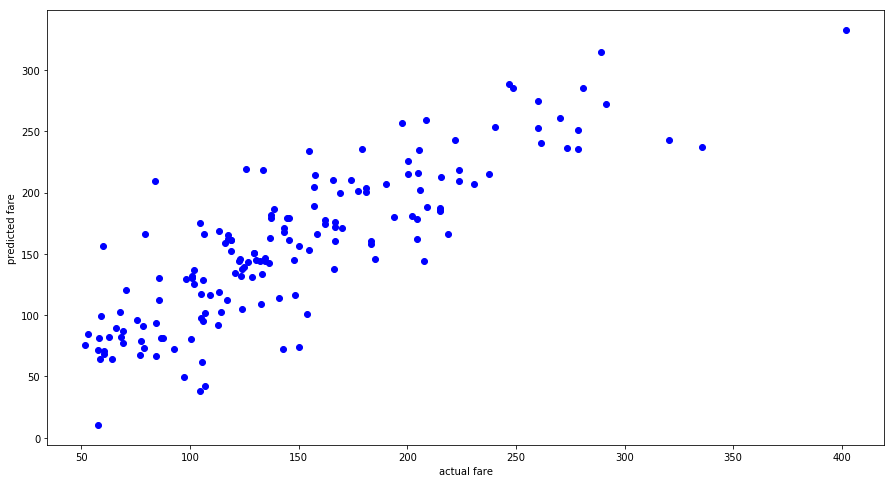

In [42]:
visualize(lr_predict)

## 10.2. Random Forest Regression Model

#### 10.2.1. Trainig the data on Random Forest Regression Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators=1000,random_state=10)
#rf = RandomForestRegressor()
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [45]:
rf_predict = rf.predict(x_test)

#### 10.2.2. Calculatng the model evaluation metric and RMSE score

In [46]:
# print results of RMSE
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_predict))
print('Root Mean Square Error:',rf_rmse)

Root Mean Square Error: 24.32037732748788


#### 10.2.3. Visualize the results

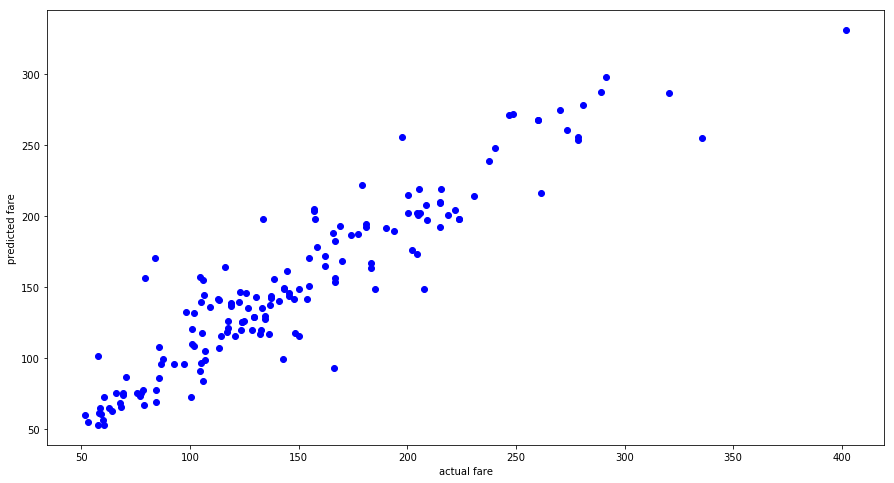

In [47]:
visualize(rf_predict)

In [48]:
displayResults('Random Forest Regressor',x_test,y_test,rf_predict).head()

Resultant values of Random Forest Regressor


,NEW,VACATION,SW,HI,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,AtleastOneHighTrafficCity,FARE,Predicted Fare
0,3,1,0,1833.95,24575,5787293,1197234,1,1,2372,10235,0,133.35,198.42385
1,3,0,0,5155.47,34880,5787293,1594251,1,1,2682,3677,0,402.02,331.38118
2,3,0,0,6143.20,32991,2761118,8621121,1,0,1015,13123,0,278.39,253.87816
3,3,0,1,4109.87,24307,7830332,989164,1,1,276,8793,0,68.06,65.89517
4,3,0,0,3474.23,26101,8621121,1021830,0,1,426,12883,0,154.73,151.25973


## 10.3. XGBoost Model

#### 10.3.1. Training of data using XGBOOST on Gamma Regression.

In [49]:
import xgboost as xgb

In [50]:
# Instantiate model 
my_model = xgb.XGBRegressor(objective ='reg:gamma',nround=50,n_estimators = 1000)
# Train the model on training data
my_model.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nround=50, nthread=None, objective='reg:gamma',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [51]:
# make predictions
predictions = my_model.predict(x_test)

#### 10.3.2. Calculatng the model evaluation metric and RMSE score

In [52]:
# print results of RMSE
xgb_rmse=np.sqrt(mean_squared_error(y_test,predictions))
print('Root Mean Square Error:',xgb_rmse)

Root Mean Square Error: 18.21771700419215


In [53]:
displayResults('XGBoost Regressor',x_test,y_test,predictions).head()

Resultant values of XGBoost Regressor


,NEW,VACATION,SW,HI,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,AtleastOneHighTrafficCity,FARE,Predicted Fare
0,3,1,0,1833.95,24575,5787293,1197234,1,1,2372,10235,0,133.35,159.740204
1,3,0,0,5155.47,34880,5787293,1594251,1,1,2682,3677,0,402.02,373.135559
2,3,0,0,6143.20,32991,2761118,8621121,1,0,1015,13123,0,278.39,266.638062
3,3,0,1,4109.87,24307,7830332,989164,1,1,276,8793,0,68.06,66.377510
4,3,0,0,3474.23,26101,8621121,1021830,0,1,426,12883,0,154.73,151.951660


#### 10.3.3. Visualize the results

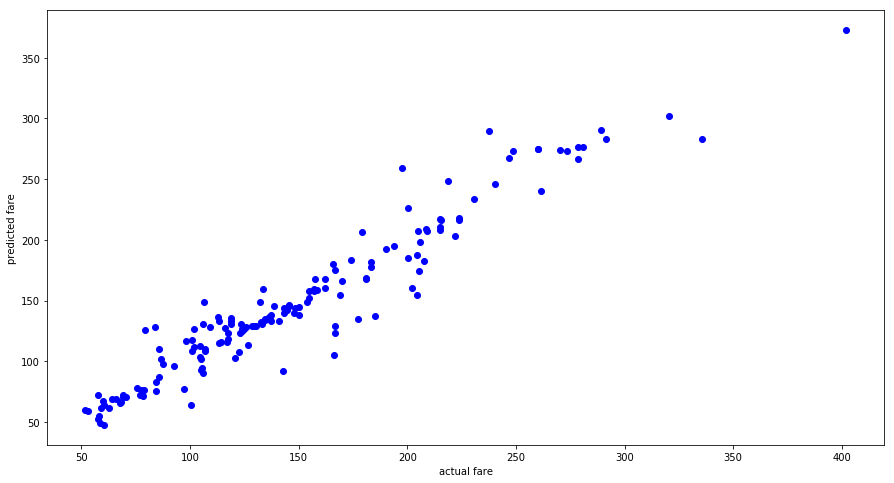

In [54]:
visualize(predictions)

In [58]:
score=r2_score(y_test,predictions)
score

0.921651566261162

## 11. Comparison of Mean Square Error in diff Algorithms

In [201]:
root_mean_square_err_list=[lr_rmse,rf_rmse,xgb_rmse] # list of rmse values of three models
model_name=['Linear_Regression','Random_Forest','XGBoost'] # list of the names of the algorithms

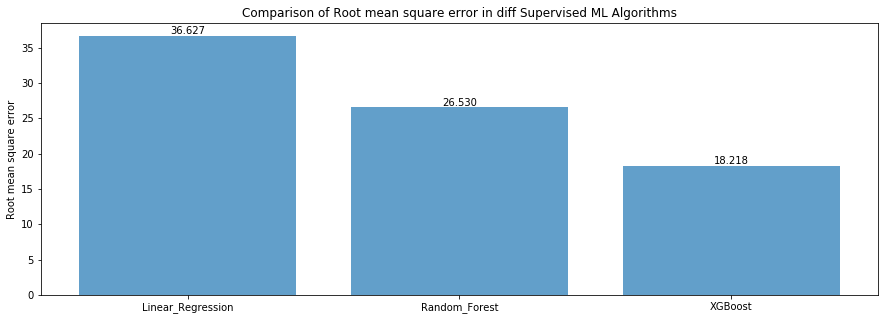

In [290]:
y_pos = np.arange(len(model_name)) # setting the renge of y-axis
plt.figure(figsize=(15,5)) # size of the chart
bar1 = plt.bar(y_pos, root_mean_square_err_list, align='center', alpha=0.7) # constructing the bar chart
for i,rect in enumerate(bar1): 
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.3f' % float(root_mean_square_err_list[i]), ha='center', va='bottom')

plt.xticks(y_pos, model_name)
plt.ylabel('Root mean square error')
plt.title('Comparison of Root mean square error in diff Supervised ML Algorithms')
plt.savefig('RMSE_vs_algo.png')
plt.show()

#### XGBoost algorithm performs better in predicting the fare, compared to Linear regression and Random forest Regressor models